### A. Perkenalan

Kelompok 5 :
- Adjie Perdana Kusuma (PYTN-KS12-010)
- Yunita Yulianda (PYTN-KS12-001)
- Naufal Reza Pahlevi (PYTN-KS12-021)

Dataset yang digunakan adalah data Uber and Lyft yang merupakan kumpulan data yang berisi informasi tentang perjalanan yang diambil oleh pengemudi Uber dan Lyft di kota Boston, Massachusetts. Dataset ini bersumber dari website kaggle : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma. Data ini memuat 693.071 baris dan 57 kolom yang merepresentasikan fitur-fitur dalam dataset tersebut. Dari 57 kolom, yang menjadi kolom label atau fitur target pada prediksi adalah fitur 'price' yang berisikan nilai kontinu, artinya nilai dalam fitur ini dipengaruhi oleh fitur/kolom lainnya dalam dataset. Dataset ini memiliki sebanyak 55095 nilai null yang berada pada fitur price.

Dengan dataset ini akan dilakukan prediksi menggunakan konsep regression dengan membagi datanya kedalam variabel independen(variabel tak terikat) yang berisikan fitur-fitur selain price, dan variabel dependen (variabel terikat) yang berisikan fitur 'price'. Konsep regresion akan diimplementasikan dengan algoritma Linear Regression dalam beberapa jenis model yaitu model Linear Regression, XGBoost, Desicion Tree Regressor, dan Random Forest Regressor. 

### B. Import pustaka yang dibutuhkan

In [1]:
# Data Loading, data cleaning
import numpy as np
import pandas as pd

# Data Exploration
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Data Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Model Definition
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

Dilakukan import library yang dibutuhkan selama pengerjaan project, dan juga melakukan akses ke beberapa fungsi untuk nantinya akan digunakan selama proses menjalankan model regresi. 

### C. Data Loading

In [2]:
# Membaca file
uber_lyft = pd.read_csv('rideshare_kaggle.csv')

Dilakukan proses membaca file csv menggunakan library pandas. Data tersebut kemudian dimasukkan dalam dataFrame dengan nama uber_lyft agar mempermudah penggunaan ke proses selajutnya.  

In [3]:
# Menampilkan data teratas
uber_lyft.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Menampilkan 5 data teratas dan dapat dilihat bahwa data ini berisi 57 kolom dimulai dari id sampai kekolom apparentTemperatureMaxTime.

In [4]:
# Menampilkan data terbawah
uber_lyft.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Menampilkan 5 data terbawah dengan fungsi tail(). Dapat dilihat bahwa baris terbawah dari data ini adalah 693070.

In [5]:
# Menampilkan informasi data
uber_lyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Code diatas digunakan untuk mengetahui informasi umum tentang dataset, seperti jumlah baris dan kolom, tipe data dari setiap kolom, serta jumlah nilai yang hilang atau kosong pada setiap kolom. Dapat dilihat bahwa fitur-fitur dalam data ini memiliki keberagaman tipe data yaitu float64(29 fitur), int64(17 fitur), object(11 fitur).  

In [6]:
# Menampilkan dimensi data
uber_lyft.shape

(693071, 57)

Menampilkan dimensi data yang berisikan 6930671 baris dan 57 kolom/fitur.

### D. Data Cleaning

In [7]:
# Menghapus kolom yang tidak digunakan
uber_lyft.drop(["id", "timestamp", "datetime", "timezone", "product_id", "hour","day", "month", "visibility", "latitude", "longitude", "temperature", "apparentTemperature", "short_summary", "icon", "long_summary", "precipIntensity", "precipProbability", "humidity", "windSpeed", "windGust", "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", "apparentTemperatureLowTime", "dewPoint", "pressure", "windBearing", "cloudCover", "uvIndex", "visibility.1", "ozone", "sunriseTime", "sunsetTime", "moonPhase", "precipIntensityMax", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime"], axis=1, inplace=True)

Code diatas digunakan untuk menghapus kolom-kolom yang tidak digunakan dalam proses prediksi. Dari 57 kolom, ada 50 kolom yang dihapus karena dianggap kurang memengaruhi perubahan terhadap fitur 'price'. Setelah dilakukan proses penghapusan kolom, terdapat 7 kolom yang dianggap paling relevan memengaruhi perubahan harga uber dan lyft yaitu :
* source : Lokasi asal dari perjalanan. 
* destination : Lokasi tujuan dari perjalanan.
* cab_type : Tipe layanan transportasi yang tersedia. Dalam dataset ini, tipe layanan yang tersedia adalah Uber dan Lyft
* name : Nama layanan transportasi yang tersedia. Dalam dataset ini, nama layanan yang tersedia adalah 'Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool'.
* distance : Jarak tempuh dalam mil antara lokasi asal dan tujuan.
* price : Harga atau biaya perjalanan dalam dolar Amerika Serikat.
* surge_multiplier : Faktor pengali yang diterapkan pada harga normal ketika permintaan tinggi dan pasokan rendah.

In [8]:
# Mengubah nama kolom
uber_lyft.rename(columns={'source': 'Pickup','destination':'Destination', 'cab_type': 'Taxi_product','name': 'Taxi_name', 'distance':'Distance', 'surge_multiplier':'Surge_multiplier', 'price':'Price'}, inplace=True)

Code diatas dilakukan untuk mengubah nama kolom agar penggunaanya lebih mudah. Diakhir diterapkan inplace=True agar perubahan yang dilakukan hanya akan terjadi pada objek DataFrame yang digunakan tanpa membuat salinan DataFrame yang baru.

In [9]:
# Menampilkan 2 data teratas
uber_lyft.head(2)

,Pickup,Destination,Taxi_product,Taxi_name,Price,Distance,Surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0


Code diatas menampilkan 2 data teratas untuk melihat perubahan pada nama kolom

In [10]:
# Melihat nilai null
uber_lyft.isnull().sum()

Pickup                  0
Destination             0
Taxi_product            0
Taxi_name               0
Price               55095
Distance                0
Surge_multiplier        0
dtype: int64

Code diatas digunakan untuk melihat missing value dalam fitur-fitur yang digunakan. Missing value terdapat pada kolom 'price' sebesar 55095 data. Sedangkan kolom/fitur lain tidak ditemukan missing value.

In [11]:
# Melakukan penghapusan baris yang terdapat null
uber_lyft.dropna(axis=0, inplace=True)
uber_lyft.head(10)

,Pickup,Destination,Taxi_product,Taxi_name,Price,Distance,Surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
5,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0
6,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0
7,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0
8,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0
9,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0


Untuk menanggulangi missing value pada kolom 'price' dilakukan penghapusan data sebesar jumlah missing value tersebut. Penghapusan dilakukan dengan fungsi dropna() yang digunakan untuk menghapus semua baris yang terdapat missing value di salah satu fiturnya. Penghapusan data dilakukan karena data yang memiliki missing value tidak terlalu besar dibandingkan dengan data keseluruhan. Dari 693070 data hanya 55095 data null, artinya hanya ada sekitar 7% dari keseluruhan data yang terdeteksi adanya missing value. Dengan hanya 7% data null dianggap data data yang tersisa tanpa null masih sangat cukup untuk mewakili data asli. 

In [12]:
# Melihat nilai null setelah dihapus
uber_lyft.isnull().sum()

Pickup              0
Destination         0
Taxi_product        0
Taxi_name           0
Price               0
Distance            0
Surge_multiplier    0
dtype: int64

Code diatas menampilkan kembali perhitungan nilai null untuk semua kolom, setelah dilakukan penghapusan baris yang terdapat missing value maka dapat dipastikan semua kolom tidak lagi memiliki missing value (nilai null).

In [13]:
# Menampilkan informasi data setelah dilakukan penghapusan
uber_lyft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Pickup            637976 non-null  object 
 1   Destination       637976 non-null  object 
 2   Taxi_product      637976 non-null  object 
 3   Taxi_name         637976 non-null  object 
 4   Price             637976 non-null  float64
 5   Distance          637976 non-null  float64
 6   Surge_multiplier  637976 non-null  float64
dtypes: float64(3), object(4)
memory usage: 38.9+ MB


Menampilkan kembali informasi data untuk melihat perubahan jumlah data setelah dilakukan penghapusan. Jumlah data awal untuk setiap kolom adalah 693071, dan dilakukan penghapusan sebesar 55095 data. Maka ada 637976 data yang akan digunakan selama proses prediksi regresi.

In [14]:
# Membuat kolom baru
uber_lyft["Route"] = uber_lyft["Pickup"] + " to " + uber_lyft["Destination"]

Code diatas melakukan pembuatan kolom/fitur baru yang merupakan penggabungan dari 2 fitur awal yaitu Pickup dan Destination. Kolom baru diberi nama 'Route' karena kolom ini akan merepresentasikan rute perjalanan uber dan lyft dari Pickup ke Destination.

In [15]:
# Menampilkan 10 data teratas
uber_lyft.head(10)

,Pickup,Destination,Taxi_product,Taxi_name,Price,Distance,Surge_multiplier,Route
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Haymarket Square to North Station
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Haymarket Square to North Station
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Haymarket Square to North Station
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Haymarket Square to North Station
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Haymarket Square to North Station
5,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,Haymarket Square to North Station
6,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0,Back Bay to Northeastern University
7,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0,Back Bay to Northeastern University
8,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0,Back Bay to Northeastern University
9,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0,Back Bay to Northeastern University


Code diatas menampilkan 10 data teratas untuk melihat penambahan kolom.

In [16]:
# Melakukan penghapusan kolom
uber_lyft.drop(['Pickup', 'Destination'], axis=1, inplace=True)

Dilakukan penghapusan kolom Pickup dan Destination karena kedua kolom tersebut sudah di gabungkan dalam kolom baru yaitu 'Route'.

In [17]:
# Menampilkan data teratas
uber_lyft.head()

,Taxi_product,Taxi_name,Price,Distance,Surge_multiplier,Route
0,Lyft,Shared,5.0,0.44,1.0,Haymarket Square to North Station
1,Lyft,Lux,11.0,0.44,1.0,Haymarket Square to North Station
2,Lyft,Lyft,7.0,0.44,1.0,Haymarket Square to North Station
3,Lyft,Lux Black XL,26.0,0.44,1.0,Haymarket Square to North Station
4,Lyft,Lyft XL,9.0,0.44,1.0,Haymarket Square to North Station


Menampilkan kembali data teratas untuk melihat perubahan, dapat dilihat bahwa terdapat 6 kolom baru yaitu Taxi_product, Taxi_name, Price, Distance, Surge_multiplier, dan Route. 

In [18]:
print('Keunikan data pada kolom Route sebanyak     :', uber_lyft['Route'].nunique())
print('Keunikan data pada kolom Taxi_name sebanyak :', uber_lyft['Taxi_name'].nunique())

Keunikan data pada kolom Route sebanyak     : 72
Keunikan data pada kolom Taxi_name sebanyak : 12


Code diatas dilakukan pengecekan keunikan data untuk kolom route dan taxi_name, karena pada proses processing akan dilakukan label encoder.

### E. Eksplorasi Data

In [19]:
#mensortir data jenis taxi menurut data yang terbesar hingga terkecil
taxiname = uber_lyft['Taxi_name'].value_counts()
taxiname = taxiname.sort_values(ascending=False)

In [20]:
taxiname

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: Taxi_name, dtype: int64

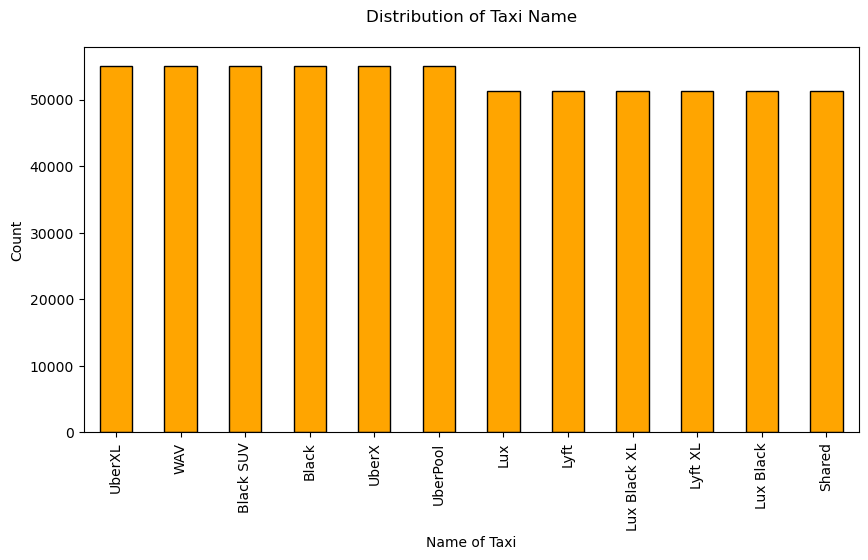

In [21]:
# Menampilkan plot horizontal bar dari dataframe taxiname
# dengan ukuran gambar 10 x 5 inci
taxiname.plot(kind='bar', figsize=(10,5), color='orange', edgecolor='black')

# Menetapkan label untuk sumbu x
plt.xlabel("Name of Taxi")

# Menetapkan label untuk sumbu y
plt.ylabel("Count")

# Menetapkan judul untuk plot
plt.title("Distribution of Taxi Name\n")

# Menampilkan plot
plt.show()

Code diatas digunakan untuk menampilkan distribusi data dari jumlah beberapa jenis mobil taxi yang paling banyak digunakan dengan tampilan 
berupa barchart dengan 

In [22]:
#Membuat dataframe rute_distance yang merupakan hasil pengelompokkan berdasarkan kategori rute (Route) dan destinasi (Distance)
rute_distance = uber_lyft.groupby(['Route'])['Distance'].first()


In [23]:
# Mengurutkan nilai berdasarkan dari yang terbesar hingga terkecil
rute_distance = rute_distance.sort_values(ascending=False)
rute_distance

Route
Financial District to Boston University          4.44
Fenway to Financial District                     4.43
Northeastern University to Financial District    4.23
Financial District to Fenway                     3.80
Boston University to Financial District          3.68
                                                 ... 
Haymarket Square to West End                     0.71
Theatre District to South Station                0.55
South Station to Financial District              0.54
Haymarket Square to North Station                0.44
Financial District to South Station              0.39
Name: Distance, Length: 72, dtype: float64

In [24]:
rute_distance_top10 = rute_distance.head(10)

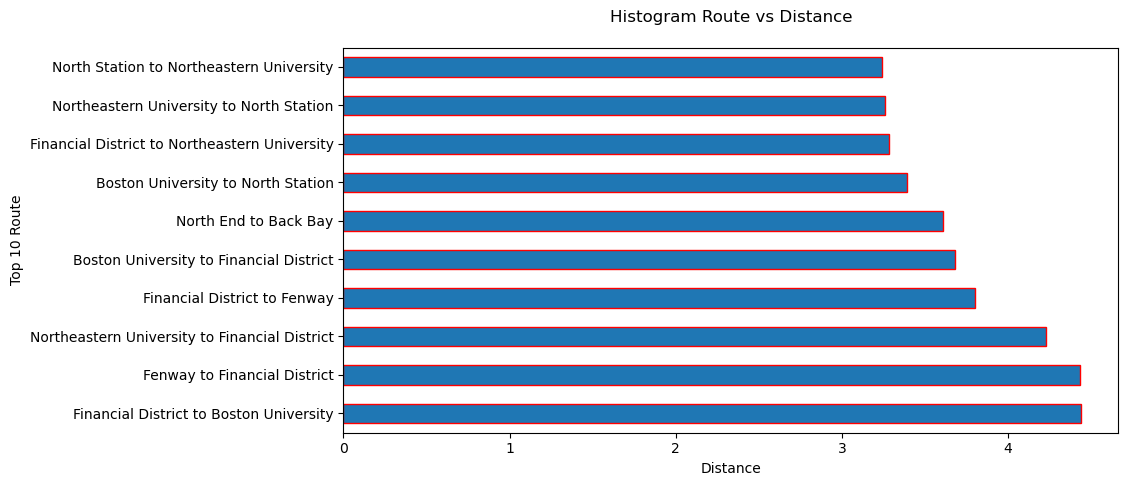

In [25]:
rute_distance_top10.plot(kind='barh', figsize=(10,5), edgecolor='red')

# Menetapkan label untuk sumbu x
plt.xlabel("Distance")

# Menetapkan label untuk sumbu y
plt.ylabel("Top 10 Route")

# Menetapkan judul untuk plot
plt.title("Histogram Route vs Distance\n")

# Menampilkan plot
plt.show()

Code diatas menampilkan plot dari sebuah histogram yang menampilkan data yang berkaitan dengan 10 rute teratas yang sering di gunakan dengan jarak tertinggi.

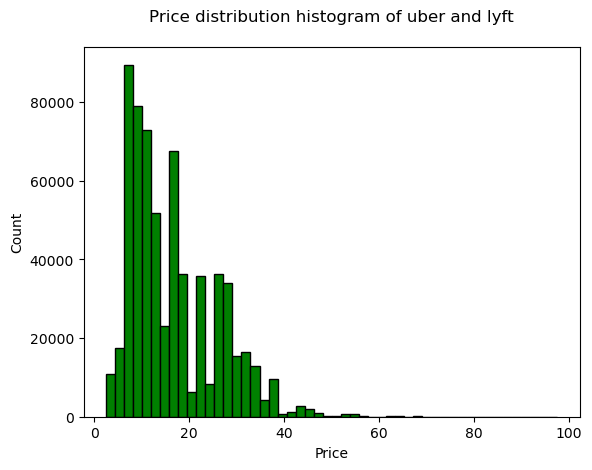

In [26]:
plt.hist(uber_lyft['Price'], bins=50, color='green', edgecolor='black')

# Menetapkan label untuk sumbu x
plt.xlabel("Price")

# Menetapkan label untuk sumbu y
plt.ylabel("Count")

# Menetapkan judul untuk plot
plt.title("Price distribution histogram of uber and lyft\n")

# Menampilkan plot
plt.show()

Plot ini biasanya digunakan untuk melihat hubungan dari dua variabel. Dari plot yang dihasilkan dapat disimpulkan bahwa variabel price dan count memiliki hubungan yang merata

In [27]:
# menampilkan jumlah dari masing masing produk taxi(Taxi_product) antara Uber dan Lyft
taxiproduct = uber_lyft['Taxi_product'].value_counts()
taxiproduct

Uber    330568
Lyft    307408
Name: Taxi_product, dtype: int64

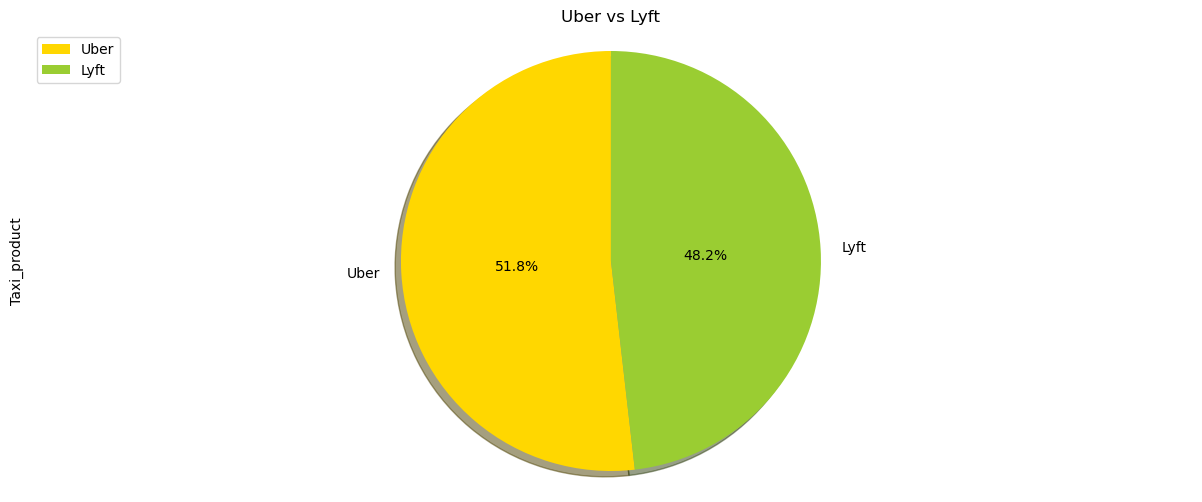

In [28]:
# Menampilkan Pie Chart berdasarkan warna yang ditentukan
color_list = ["gold", "yellowgreen"]

# Menampilkan chart yang menarik dan lebih mudah dipahami
taxiproduct.plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=taxiproduct.index
    ,colors=color_list
    ,pctdistance=0.45
)

# Menampilkan title untuk chart yang dibuat
plt.title("Uber vs Lyft")
plt.axis('equal')
plt.legend(loc='upper left')

Pie Chart diatas menampilkan presentasi dari kedua product taxi yaitu Uber dengan tampilan warna kuning sebanyak 51,8% dan Lyft dengan tampilan warna hijau sebanyak 48,2%.

<function matplotlib.pyplot.show(close=None, block=None)>

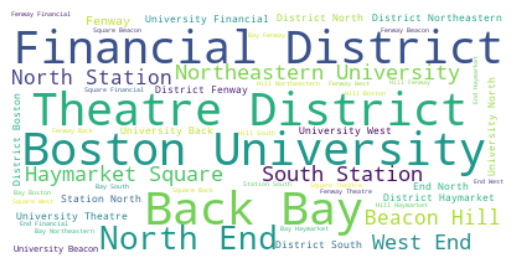

In [29]:
source_cloud = uber_lyft['Route']
text = ' '.join(source_cloud)
sourceWC = WordCloud(
    background_color='white',
    max_words=600000,
).generate(text)

# Membangun plot
plt.imshow(sourceWC, interpolation='bilinear')
plt.axis('off')

# Menampilkan plot
plt.show

Kode diatas menggunakan data dari rute taxi yang diolah, tujuan dari World Clouds ini adalah untuk melihat nama kota mana yang paling sering muncul.

### F. Data Preprocessing

In [30]:
# Melakukan pengecekan kolom kategorikal
category_col = uber_lyft.select_dtypes(include=['object']).columns.tolist()
for column in uber_lyft[category_col]:
    print(f'{column} : {uber_lyft[column].unique()}')
    print()

Taxi_product : ['Lyft' 'Uber']

Taxi_name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

Route : ['Haymarket Square to North Station' 'Back Bay to Northeastern University'
 'North End to West End' 'North Station to Haymarket Square'
 'Beacon Hill to South Station' 'North Station to Northeastern University'
 'North Station to Fenway' 'North Station to South Station'
 'Haymarket Square to West End' 'Haymarket Square to Theatre District'
 'North End to Beacon Hill' 'Haymarket Square to Beacon Hill'
 'Boston University to North Station' 'Fenway to West End'
 'South Station to Back Bay' 'Fenway to North Station'
 'Theatre District to North End' 'West End to Northeastern University'
 'North End to Back Bay' 'Theatre District to Haymarket Square'
 'Beacon Hill to Fenway' 'Back Bay to North End'
 'North Station to North End' 'Financial District to Haymarket Square'
 'Fenway to Financial District' 'Back Bay to Fenway'
 'Nor

Dengan kode diatas, kita dapat melihat nilai unik yang terdapat dalam setiap kolom bertipe data object pada dataset uber_lyft, sehingga dapat membantu dalam memahami data dan membuat keputusan tentang bagaimana cara memproses dan menganalisis dataset tersebut

In [31]:
# Menerapkan LabelEncoder pada kolom 'Taxi_product'
le = LabelEncoder()
uber_lyft['Taxi_product'] = le.fit_transform(uber_lyft['Taxi_product'])

uber_lyft.head(20)

,Taxi_product,Taxi_name,Price,Distance,Surge_multiplier,Route
0,0,Shared,5.0,0.44,1.0,Haymarket Square to North Station
1,0,Lux,11.0,0.44,1.0,Haymarket Square to North Station
2,0,Lyft,7.0,0.44,1.0,Haymarket Square to North Station
3,0,Lux Black XL,26.0,0.44,1.0,Haymarket Square to North Station
4,0,Lyft XL,9.0,0.44,1.0,Haymarket Square to North Station
5,0,Lux Black,16.5,0.44,1.0,Haymarket Square to North Station
6,0,Lyft XL,10.5,1.08,1.0,Back Bay to Northeastern University
7,0,Lux Black,16.5,1.08,1.0,Back Bay to Northeastern University
8,0,Shared,3.0,1.08,1.0,Back Bay to Northeastern University
9,0,Lux Black XL,27.5,1.08,1.0,Back Bay to Northeastern University


Code diatas digunakan untuk mengubah nilai kategorikal pada kolom "Taxi_product" menjadi nilai numerik menggunakan fungsi LabelEncoder() yang merupakan teknik yang digunakan untuk mengubah nilai kategorikal menjadi nilai numerik, sehingga memungkinkan kita untuk menggunakan variabel tersebut dalam model yang memerlukan input numerik.

In [32]:
# Menerapkan LabelEncoder pada kolom Route
le = LabelEncoder()
uber_lyft['Route'] = le.fit_transform(uber_lyft['Route'])

uber_lyft.head(20)

,Taxi_product,Taxi_name,Price,Distance,Surge_multiplier,Route
0,0,Shared,5.0,0.44,1.0,33
1,0,Lux,11.0,0.44,1.0,33
2,0,Lyft,7.0,0.44,1.0,33
3,0,Lux Black XL,26.0,0.44,1.0,33
4,0,Lyft XL,9.0,0.44,1.0,33
5,0,Lux Black,16.5,0.44,1.0,33
6,0,Lyft XL,10.5,1.08,1.0,4
7,0,Lux Black,16.5,1.08,1.0,4
8,0,Shared,3.0,1.08,1.0,4
9,0,Lux Black XL,27.5,1.08,1.0,4


Code diatas digunakan untuk mengubah nilai kategorikal pada kolom "Route" menjadi nilai numerik menggunakan fungsi LabelEncoder() 

In [33]:
# Menerapkan One Hot Encode pada kolom 'Taxi_name'
encode = pd.get_dummies(uber_lyft['Taxi_name'])
encode

,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0,0,0,0,0,0,0,0,0,0,0,1
693066,0,0,0,0,0,0,0,0,0,0,1,0
693067,0,0,0,0,0,0,0,0,0,1,0,0
693069,0,1,0,0,0,0,0,0,0,0,0,0


Code diatas digunakan untuk membuat DataFrame baru yang berisi hasil transformasi kolom "Taxi_name" dari dataset uber_lyft menggunakan teknik One-Hot Encoding. Teknik ini mengubah nilai kategorikal pada kolom "Taxi_name" menjadi nilai numerik dalam bentuk kolom-kolom biner baru yang dapat digunakan dalam model yang memerlukan input numerik. Dapat dilihat bahwa keunikan data dalam 'Taxi_name' diubah menjadi kolom-kolom baru.

In [34]:
# Menggabungkan hasil one hot encode dengan dataFarme uber and lyft
uber_lyft = uber_lyft.join(encode)
uber_lyft

,Taxi_product,Taxi_name,Price,Distance,Surge_multiplier,Route,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0,Shared,5.0,0.44,1.0,33,0,0,0,0,0,0,0,1,0,0,0,0
1,0,Lux,11.0,0.44,1.0,33,0,0,1,0,0,0,0,0,0,0,0,0
2,0,Lyft,7.0,0.44,1.0,33,0,0,0,0,0,1,0,0,0,0,0,0
3,0,Lux Black XL,26.0,0.44,1.0,33,0,0,0,0,1,0,0,0,0,0,0,0
4,0,Lyft XL,9.0,0.44,1.0,33,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1,WAV,9.5,1.00,1.0,69,0,0,0,0,0,0,0,0,0,0,0,1
693066,1,UberXL,13.0,1.00,1.0,69,0,0,0,0,0,0,0,0,0,0,1,0
693067,1,UberX,9.5,1.00,1.0,69,0,0,0,0,0,0,0,0,0,1,0,0
693069,1,Black SUV,27.0,1.00,1.0,69,0,1,0,0,0,0,0,0,0,0,0,0


Code diatas digunakan untuk menggabungkan dataFrame hasil one hot encode dengan dataFrame uber_lyft dengan fungsi join()

In [35]:
# Melakukan penghapusan kolom 'Taxi_name'
uber_lyft.drop(['Taxi_name'], axis=1, inplace=True)

In [36]:
uber_lyft

,Taxi_product,Price,Distance,Surge_multiplier,Route,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0,5.0,0.44,1.0,33,0,0,0,0,0,0,0,1,0,0,0,0
1,0,11.0,0.44,1.0,33,0,0,1,0,0,0,0,0,0,0,0,0
2,0,7.0,0.44,1.0,33,0,0,0,0,0,1,0,0,0,0,0,0
3,0,26.0,0.44,1.0,33,0,0,0,0,1,0,0,0,0,0,0,0
4,0,9.0,0.44,1.0,33,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1,9.5,1.00,1.0,69,0,0,0,0,0,0,0,0,0,0,0,1
693066,1,13.0,1.00,1.0,69,0,0,0,0,0,0,0,0,0,0,1,0
693067,1,9.5,1.00,1.0,69,0,0,0,0,0,0,0,0,0,1,0,0
693069,1,27.0,1.00,1.0,69,0,1,0,0,0,0,0,0,0,0,0,0


Code diatas dilakukan penghapusan kolom 'Taxi_name' pada dataFrame uber_lyft karena kolom tersebut sudah dilakukan onehot encode, dan data kolom tersebut tidak digunakan lagi. 

In [37]:
uber_lyft.corr()

,Taxi_product,Price,Distance,Surge_multiplier,Route,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
Taxi_product,1.000000,-0.083385,0.001941,-0.163745,0.000963,0.296479,0.296482,-0.306431,-0.306431,-0.306431,-0.306431,-0.306431,-0.306425,0.296467,0.296476,0.296482,0.296482
Price,-0.083385,1.000000,0.345061,0.240458,-0.030206,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,-0.256930,-0.223551,-0.028587,-0.223557
Distance,0.001941,0.345061,1.000000,0.025946,-0.103760,0.000579,0.000573,-0.000597,-0.000597,-0.000597,-0.000597,-0.000597,-0.000585,0.000578,0.000577,0.000573,0.000573
Surge_multiplier,-0.163745,0.240458,0.025946,1.000000,-0.033976,-0.048547,-0.048547,0.068468,0.068468,0.068468,0.071157,0.071157,-0.046660,-0.048545,-0.048546,-0.048547,-0.048547
Route,0.000963,-0.030206,-0.103760,-0.033976,1.000000,0.000287,0.000288,-0.000297,-0.000297,-0.000297,-0.000297,-0.000297,-0.000286,0.000282,0.000281,0.000288,0.000288
Black,0.296479,0.131185,0.000579,-0.048547,0.000287,1.000000,-0.094523,-0.090850,-0.090850,-0.090850,-0.090850,-0.090850,-0.090848,-0.094518,-0.094521,-0.094523,-0.094523
Black SUV,0.296482,0.453096,0.000573,-0.048547,0.000288,-0.094523,1.000000,-0.090851,-0.090851,-0.090851,-0.090851,-0.090851,-0.090849,-0.094519,-0.094522,-0.094524,-0.094524
Lux,-0.306431,0.038857,-0.000597,0.068468,-0.000297,-0.090850,-0.090851,1.000000,-0.087321,-0.087321,-0.087321,-0.087321,-0.087319,-0.090847,-0.090849,-0.090851,-0.090851
Lux Black,-0.306431,0.206544,-0.000597,0.068468,-0.000297,-0.090850,-0.090851,-0.087321,1.000000,-0.087321,-0.087321,-0.087321,-0.087319,-0.090847,-0.090849,-0.090851,-0.090851
Lux Black XL,-0.306431,0.500057,-0.000597,0.068468,-0.000297,-0.090850,-0.090851,-0.087321,-0.087321,1.000000,-0.087321,-0.087321,-0.087319,-0.090847,-0.090849,-0.090851,-0.090851


Code diatas digunakan untuk menampilkan nilai correlasi antar kolom untuk melihat seberapa besar keterkaitan hibungan antar kolom.

<Axes: title={'center': 'Correlation in Headmap\n'}>

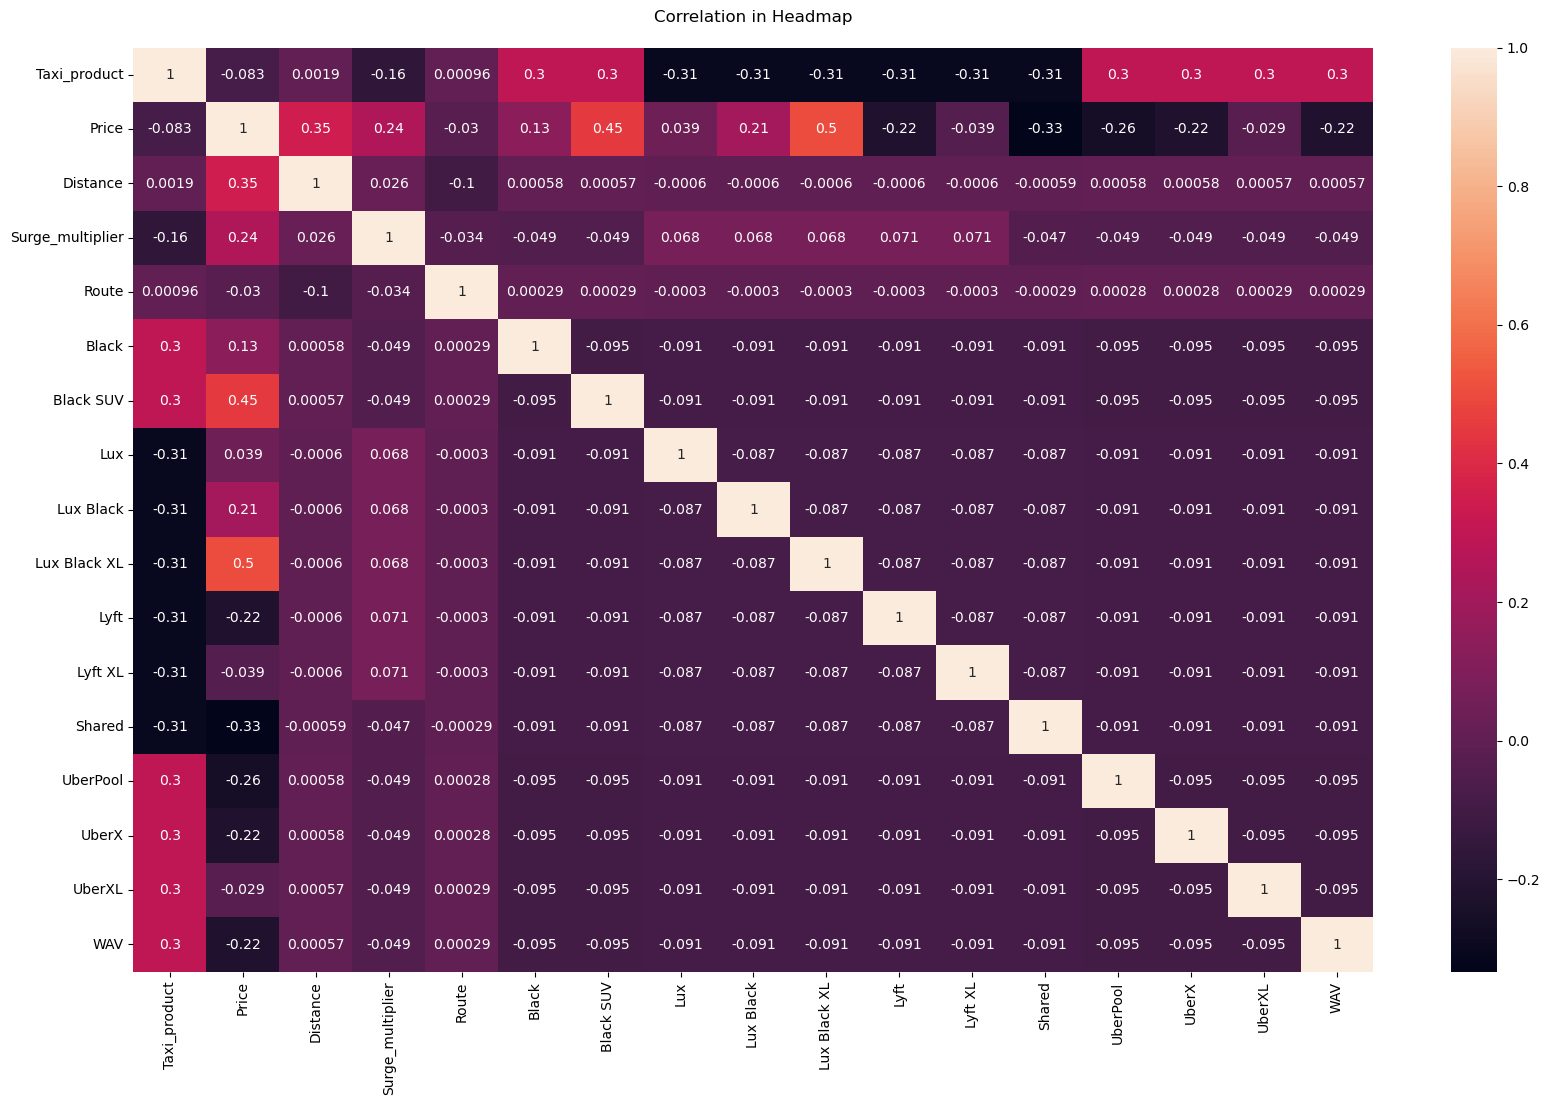

In [38]:
plt.figure(figsize=(20, 12))
plt.title('Correlation in Headmap\n')
sns.heatmap(uber_lyft.corr(),annot=True)

Kemudian, dari hasil korelasi sebelumnya divisualisasikan dalam headmap dengan fungsi sns.heatmap() guna mempermudah melihat nilai korelasinya. Dapat dilihat dari hasil visualisasi diatas, korelasi antar kolom terbilang kecil. Dan korelasi terbesar terdapat pada kolom 'price' dengan 'Distance'.

#### Split Data

In [39]:
fitur_x = ['Route', 'Taxi_product', 'Distance', 'Surge_multiplier', 'Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft', 'Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV']
fitur_y = ['Price']

In [40]:
x = uber_lyft[fitur_x]
y = uber_lyft[fitur_y]

In [41]:
x.head(5)

,Route,Taxi_product,Distance,Surge_multiplier,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,33,0,0.44,1.0,0,0,0,0,0,0,0,1,0,0,0,0
1,33,0,0.44,1.0,0,0,1,0,0,0,0,0,0,0,0,0
2,33,0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0
3,33,0,0.44,1.0,0,0,0,0,1,0,0,0,0,0,0,0
4,33,0,0.44,1.0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
y.head(5)

,Price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [44]:
print('Jumlah data dalam data Training : ', len(X_train))
print('Jumlah data dalam data Testing  : ', len(X_test))
print('Data untuk Training             :  70%')
print('Data untuk Testing              :  30%')

Jumlah data dalam data Training :  446583
Jumlah data dalam data Testing  :  191393
Data untuk Training             :  70%
Data untuk Testing              :  30%


### G. Pendefinisian Model

#### Linear Regression

In [45]:
model1 = LinearRegression()

#### XGBoost

In [46]:
model2 = xg.XGBRegressor(objective='reg:linear',n_estimators = 10, seed = 123)

#### Decision Tree Regressor

In [47]:
model3 = DecisionTreeRegressor(max_depth=5, random_state=42)

#### Random Forest Regressor

In [48]:
model4 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=33)

### H. Pelatihan Model

#### Linear Regression

In [49]:
model1.fit(X_train, y_train)

y_pred_lr = model1.predict(X_test)

In [50]:
model1.score(X_test, y_test)

0.9282472233146163

In [51]:
model1.score(X_train, y_train)

0.9270466424341965

In [52]:
pred = pd.DataFrame(y_test[:10])
pred['predict'] = y_pred_lr[:10]
pred

,Price,predict
677566,19.5,21.173068
308691,10.5,11.724112
396241,5.0,8.098183
136589,16.5,16.949238
198998,38.5,33.417293
179736,16.5,16.046611
311934,30.5,29.176560
510750,19.5,19.165795
6135,13.5,12.004767
313476,10.5,13.811116


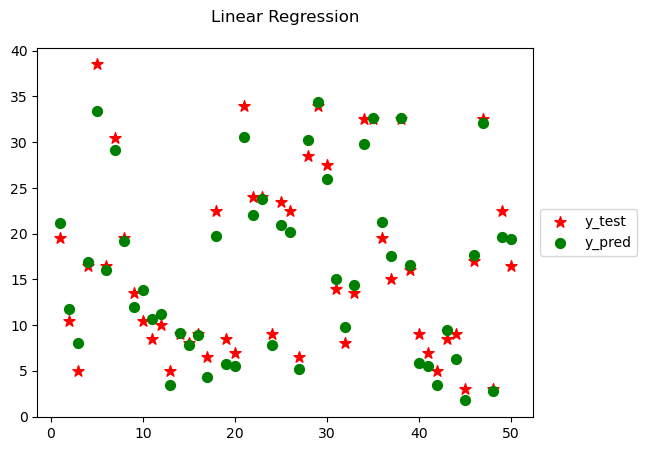

In [53]:
plt.scatter(x = range(1,51),
            y = y_test[:50],
            marker='*',
            c='r',
            s=70,
            label = 'y_test'
)

plt.scatter(x = range(1,51),
            y = y_pred_lr[:50],
            marker='o',
            c='g',
            s=50,
            label= 'y_pred'
)

plt.title('Linear Regression\n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### XGBoost

In [54]:
model2.fit(X_train, y_train)

y_pred_xgb = model2.predict(X_test)

[22:07:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [55]:
model2.score(X_train, y_train)

0.9523286842305174

In [56]:
model2.score(X_test, y_test)

0.9526562676405693

In [57]:
pred = pd.DataFrame(y_test[:10])
pred['Predict'] = y_pred_xgb[:10]
pred

,Price,Predict
677566,19.5,21.476704
308691,10.5,11.104454
396241,5.0,7.030320
136589,16.5,14.966918
198998,38.5,32.284843
179736,16.5,14.966918
311934,30.5,22.250605
510750,19.5,19.535925
6135,13.5,11.144557
313476,10.5,12.574756


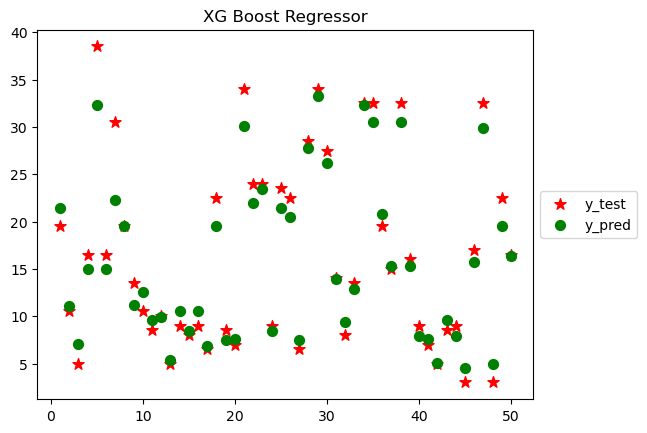

In [58]:
plt.scatter(x = range(1,51),
            y = y_test[:50],
            marker = '*',
            c = 'r',
            s = 70,
            label = 'y_test'
)

plt.scatter(x = range(1,51),
            y = y_pred_xgb[:50],
            marker = 'o',
            c = 'g',
            s = 50,
            label = 'y_pred'
)

plt.title('XG Boost Regressor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Decision Tree

In [59]:
model3.fit(X_train, y_train)

y_pred_dt = model3.predict(X_test)

In [60]:
model3.score(X_train, y_train)

0.8042651493140112

In [61]:
model3.score(X_test, y_test)

0.8030808654370112

In [62]:
pred=pd.DataFrame(y_test[:10])
pred['predict']=y_pred_dt[:10]
pred

,Price,predict
677566,19.5,24.291684
308691,10.5,10.716971
396241,5.0,10.716971
136589,16.5,17.765794
198998,38.5,34.637761
179736,16.5,17.765794
311934,30.5,10.716971
510750,19.5,17.765794
6135,13.5,10.716971
313476,10.5,17.765794


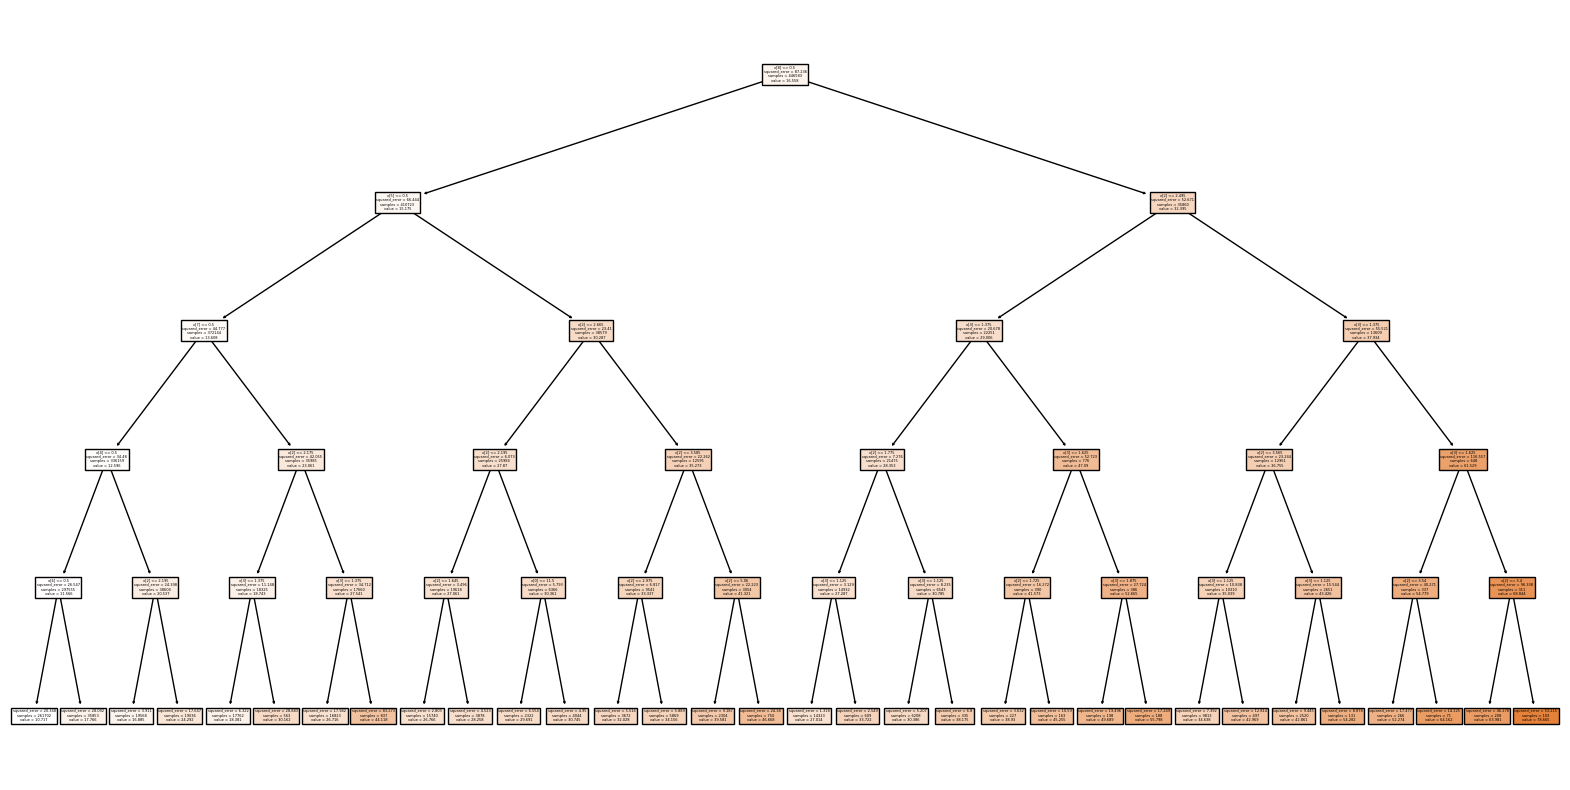

In [63]:
# Divisualisasikan model dengan plot_tree
plt.figure(figsize=(20,10))
plot_tree(model3, filled=True)
plt.show()

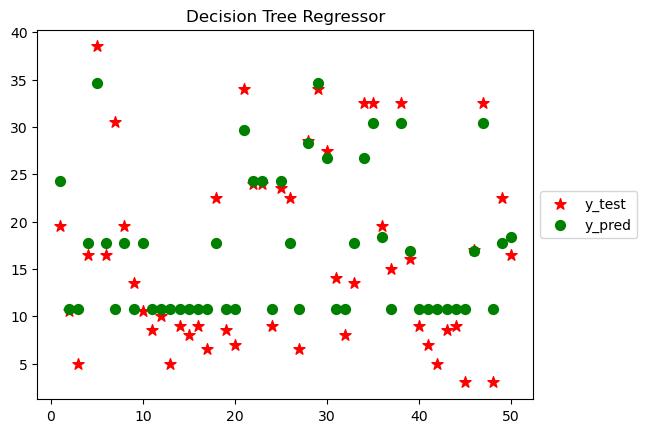

In [64]:
plt.scatter(x = range(1,51),
            y = y_test[:50],
            marker = '*',
            c = 'r',
            s = 70,
            label = 'y_test'
)

plt.scatter(x = range(1,51),
            y = y_pred_dt[:50],
            marker = 'o',
            c = 'g',
            s = 50,
            label = 'y_pred'
)

plt.title('Decision Tree Regressor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Random Forest Regressor

In [65]:
model4.fit(X_train, y_train)

y_pred_rf = model4.predict(X_test)

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_2460\628202682.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train, y_train)


In [66]:
model4.score(X_train, y_train)

0.8071814599165721

In [67]:
model4.score(X_test, y_test)

0.8063064788477278

In [68]:
pred=pd.DataFrame(y_test[:10])
pred['predict']=y_pred_rf[:10]
pred

,Price,predict
677566,19.5,24.128320
308691,10.5,10.717344
396241,5.0,10.717344
136589,16.5,17.767099
198998,38.5,34.666132
179736,16.5,17.767099
311934,30.5,10.717344
510750,19.5,17.767099
6135,13.5,10.717344
313476,10.5,17.767099


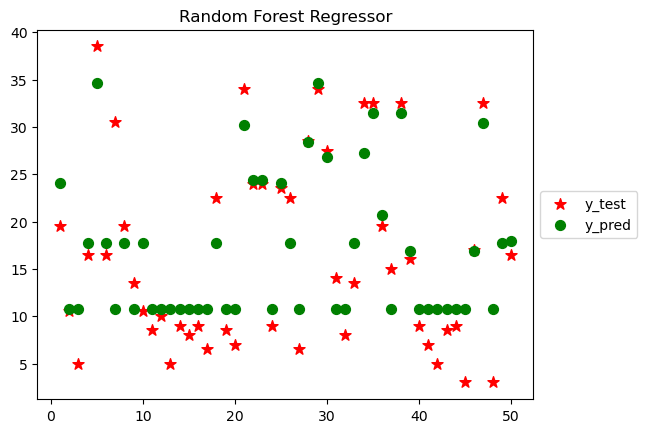

In [69]:
plt.scatter(x = range(1,51),
            y = y_test[:50],
            marker = '*',
            c = 'r',
            s = 70,
            label = 'y_test'
)

plt.scatter(x = range(1,51),
            y = y_pred_rf[:50],
            marker = 'o',
            c = 'g',
            s = 50,
            label = 'y_pred'
)

plt.title('Random Forest Regressor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Evaluasi Model

In [70]:
print('Akurasi dari model Linear Regression       = ', model1.score(X_test, y_test))
print('Akurasi dari model XGBoost                 = ', model2.score(X_test, y_test))
print('Akurasi dari model Desicion Tree           = ', model3.score(X_test, y_test))
print('Akurasi dari model Random Forest Regressor = ', model4.score(X_test, y_test))

Akurasi dari model Linear Regression       =  0.9282472233146163
Akurasi dari model XGBoost                 =  0.9526562676405693
Akurasi dari model Desicion Tree           =  0.8030808654370112
Akurasi dari model Random Forest Regressor =  0.8063064788477278


#### Linear Regression

In [71]:
mse = mean_squared_error(y_test, y_pred_lr)
print("MSE model Linear Regression :", mse)

# menghitung RMSE
rmse = np.sqrt(mse)
print("RMSE model Linear Regression :", rmse)

# menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
print("MAPE model Linear Regression :", mape)

MSE model Linear Regression : 6.1894298763663675
RMSE model Linear Regression : 2.4878564822686955
MAPE model Linear Regression : 0.13438772551667594


#### XGBoost

In [72]:
mse = mean_squared_error(y_test, y_pred_xgb)
print("MSE model Linear Regression :", mse)

# menghitung RMSE
rmse = np.sqrt(mse)
print("RMSE model Linear Regression :", rmse)

# menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
print("MAPE model Linear Regression :", mape)

MSE model Linear Regression : 4.083893684128948
RMSE model Linear Regression : 2.020864588271304
MAPE model Linear Regression : 0.09654817612389163


#### Desicion Tree

In [73]:
mse = mean_squared_error(y_test, y_pred_dt)
print("MSE model Linear Regression :", mse)

# menghitung RMSE
rmse = np.sqrt(mse)
print("RMSE model Linear Regression :", rmse)

# menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_dt)
print("MAPE model Linear Regression :", mape)

MSE model Linear Regression : 16.986341588375762
RMSE model Linear Regression : 4.121448967095888
MAPE model Linear Regression : 0.263741203888045


#### Random Forest

In [74]:
mse = mean_squared_error(y_test, y_pred_rf)
print("MSE model Linear Regression :", mse)

# menghitung RMSE
rmse = np.sqrt(mse)
print("RMSE model Linear Regression :", rmse)

# menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print("MAPE model Linear Regression :", mape)

MSE model Linear Regression : 16.70809858599779
RMSE model Linear Regression : 4.087554108020808
MAPE model Linear Regression : 0.26173929975010474
